Actividad de la semana 8

Especialización en Inteligencia Artificial Aplicada

Curso: Ciencia de datos

Tecnológico de Monterrey

Profesora: María de la Paz Rico Fernández

Nombre del estudiante: Ricardo Loor Párraga

Matrícula: A01793943

#**Ejercicio 1** 

Utiliza la base de datos de https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.


In [8]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error,  make_scorer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import power_transform
from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, train_test_split, RepeatedKFold, cross_validate

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
619,4.892767,39.192037
608,4.836046,38.343638
858,5.833620,36.820038
318,3.870496,32.169557
65,2.502705,44.442539
55,2.339399,54.029852
237,3.514743,32.757822
407,4.169175,46.398315
181,3.234686,55.790274
727,5.257626,40.388043


In [3]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

len(X)

1000

In [4]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

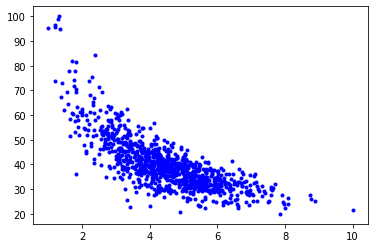

In [7]:
plt.plot(X,y,'b.')

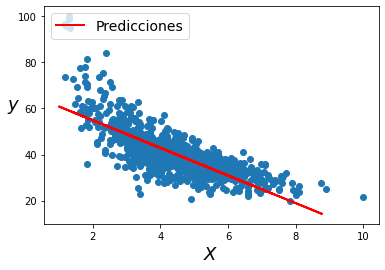

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)
lista_para_mae =[] 
lista_para_r2 =[] 

linear = LinearRegression(fit_intercept=True)
linear.fit(X_train, y_train)
X_regresion = X_test  #Se utilizan los de prueba
y_regresion = linear.predict(X_regresion)
plt.scatter(X_train, y_train)
plt.plot(X_regresion, y_regresion, "r-", linewidth=2, label="Predicciones")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [10]:
linear.coef_, linear.intercept_

print('Y =', linear.coef_,'X +', linear.intercept_)

simpleMAE = metrics.mean_absolute_error(y_test,y_regresion)
lista_para_mae.append(simpleMAE) 
r2simple = r2_score(y_test,y_regresion)
lista_para_r2.append(r2simple)

print('MAE:', metrics.mean_absolute_error(y_test,y_regresion))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_regresion)))
print('r2_score:', r2_score(y_test,y_regresion))

Y = [-5.98882699] X + 66.83650741226988
MAE: 5.013587781954963
RMSE 7.108963321847682
r2_score: 0.6116251549562579


In [11]:
polyCharac = PolynomialFeatures(degree=2, include_bias=False) 

X_polinomial = polyCharac.fit_transform(X_train)
print("Input",polyCharac.n_input_features_)
print("Ouput",polyCharac.n_output_features_)
print("Powersn",polyCharac.powers_)

poliReg = LinearRegression(fit_intercept=True) 
poliReg.fit(X_polinomial, y_train)
poliReg.coef_, poliReg.intercept_

Input 1
Ouput 2
Powersn [[1]
 [2]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The attribute `n_input_features_` was deprecated in version 1.0 and will be removed in 1.2.
  warnings.warn(msg, category=FutureWarning)


(array([-16.40638102,   1.13136095]), 88.80179909112496)

In [12]:
X_polinomial_test = polyCharac.fit_transform(X_test)
X_polinomial_test.shape

(100, 2)

In [13]:
y_con_regresion_poli = poliReg.predict(X_polinomial_test)
y_con_regresion_poli.shape

(100,)

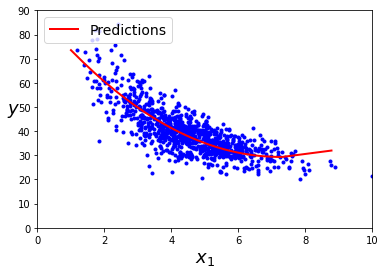

In [14]:
order = np.argsort(X_test.values.ravel()) 

sortedXPoly = X_test.values.ravel()[order] 
sortedYPoly = y_test.values.ravel()[order]
sorted_predicPoly = y_con_regresion_poli[order]
plt.plot(X, y, "b.")  
plt.plot(sortedXPoly, sorted_predicPoly, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 10, 0, 90]);

In [15]:
print('Y =', poliReg.coef_[1],'X^2 +', poliReg.coef_[0],'X +',poliReg.intercept_)

mae_regresion_lineal_multiple = metrics.mean_absolute_error(y_test,y_con_regresion_poli)
lista_para_mae.append(mae_regresion_lineal_multiple) 
r2_regresion_lineal_multiple = r2_score(y_test,y_con_regresion_poli)
lista_para_r2.append(r2_regresion_lineal_multiple)

metrica_mae = metrics.mean_absolute_error(y_test, y_con_regresion_poli)

r2Score = r2_score(y_test, y_con_regresion_poli)

print('MAE:', metrica_mae)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_con_regresion_poli)))
print('r2_score',r2Score)

Y = 1.1313609537119216 X^2 + -16.406381017212386 X + 88.80179909112496
MAE: 4.3833025759681075
RMSE: 5.832771301068423
r2_score 0.7385501224942537


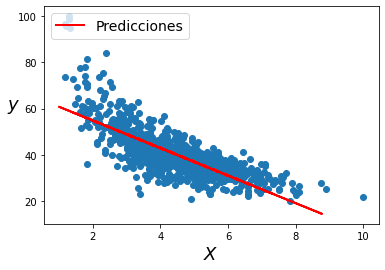

In [16]:
mi_ridge = Ridge(alpha=5.0,fit_intercept=True)
mi_ridge.fit(X_train, y_train)
X_para_ridge = X_test  
y_para_ridge = mi_ridge.predict(X_para_ridge)
plt.scatter(X_train, y_train)
plt.plot(X_para_ridge, y_para_ridge, "r-", linewidth=2, label="Predicciones")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [17]:
mae_ridge = metrics.mean_absolute_error(y_test,y_para_ridge)
lista_para_mae.append(mae_ridge)  
r2_ridge= r2_score(y_test,y_para_ridge)
lista_para_r2.append(r2_ridge)

metrica_mae_ridge = metrics.mean_absolute_error(y_test, y_para_ridge)
r2Score = r2_score(y_test, y_para_ridge)
print('MAE:', metrica_mae_ridge)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_para_ridge)))
print('r2_score',r2Score)
print('Y =', mi_ridge.coef_,'X +', mi_ridge.intercept_)

MAE: 5.0162057389928325
RMSE: 7.1111119498200965
r2_score 0.6113903530239646
Y = [-5.97003397] X + 66.75243237759665


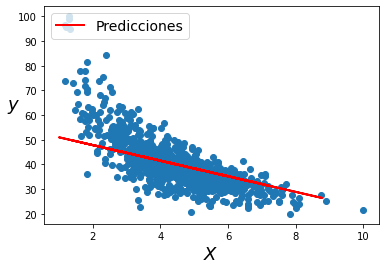

In [19]:
lasso = Lasso(alpha=5.0,fit_intercept=True) 
lasso.fit(X_train, y_train)
lassoX = X_test  
lassoY = lasso.predict(X_para_ridge)
plt.scatter(X_train, y_train)
plt.plot(lassoX, lassoY, "r-", linewidth=2, label="Predicciones")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [20]:
mae_lasso = metrics.mean_absolute_error(y_test,lassoY)
lista_para_mae.append(mae_lasso)  
r2_lasso= r2_score(y_test,lassoY)
lista_para_r2.append(r2_lasso)


metrica_mae_lasso = metrics.mean_absolute_error(y_test, lassoY)
r2Score = r2_score(y_test, lassoY)
print('Error medio Absoluto (MAE):', metrica_mae_lasso)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, lassoY)))
print('r2_score',r2Score)
print('El modelo es: Y =', lasso.coef_,'X +', lasso.intercept_)

Error medio Absoluto (MAE): 5.681207654677401
Root Mean Squared Error: 8.409660991642687
r2_score 0.456505036516648
El modelo es: Y = [-3.15572458] X + 54.16195119377413


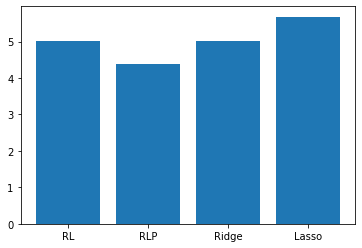

In [21]:
#MAE
nombres=list()
nombres.append('RL')
nombres.append('RLP')
nombres.append('Ridge')
nombres.append('Lasso')

plt.bar(nombres, lista_para_mae)
plt.show()

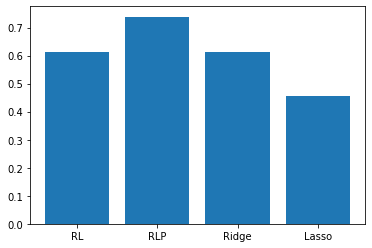

In [22]:
#R Cuadrada

nombres=list()
nombres.append('RL')
nombres.append('RLP')
nombres.append('Ridge')
nombres.append('Lasso')

plt.bar(nombres, lista_para_r2)
plt.show()

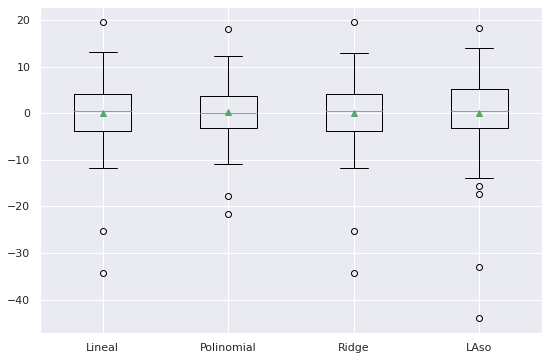

In [23]:
residuo_regresion_simple=y_regresion - y_test
residuo_regresion_poliforme= y_con_regresion_poli - y_test
residuo_ridge=y_para_ridge - y_test
residuo_lasso=lassoY - y_test
lista_residuos= [residuo_regresion_simple,residuo_regresion_poliforme,residuo_ridge,residuo_lasso]
nombres=list()
nombres.append('Lineal')
nombres.append('Polinomial')
nombres.append('Ridge')
nombres.append('LAso')

sns.set(rc={'figure.figsize':(9,6)})

plt.boxplot(lista_residuos, labels=nombres, showmeans=True)
plt.show()

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [24]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4731,3529000930,20140616T000000,530000.0,4,2.50,2050,6360,2.0,0,0,...,8,2050,0,1988,0,98029,47.5641,-122.011,2070,7541
20508,7625703357,20150227T000000,394950.0,2,2.25,1300,2104,2.0,0,0,...,8,1010,290,2011,0,98136,47.5477,-122.388,1430,1850
320,325059286,20140513T000000,819900.0,5,2.75,3150,7119,2.0,0,0,...,9,3150,0,2013,0,98052,47.6759,-122.151,1560,8384
16946,2790410250,20140505T000000,615000.0,4,1.75,2300,11700,1.0,0,0,...,9,1960,340,1977,0,98052,47.6331,-122.094,2840,12000
13373,476000333,20140827T000000,418000.0,3,2.00,1250,1306,3.0,0,0,...,7,1250,0,2001,0,98107,47.6705,-122.390,1320,1250
14009,6057700120,20140917T000000,340000.0,3,1.75,1270,8422,1.0,0,0,...,7,1270,0,1967,0,98011,47.7601,-122.197,1470,8500
18120,2924079044,20140723T000000,865000.0,3,3.75,3830,219106,2.0,0,0,...,9,3830,0,1977,1999,98027,47.5432,-121.952,2440,219106
8515,2123700100,20141202T000000,353000.0,5,2.75,2130,5000,1.0,0,0,...,7,1100,1030,1978,0,98118,47.5271,-122.274,1340,6837
4969,2473350470,20150511T000000,330000.0,3,1.50,1440,7875,1.0,0,0,...,8,1440,0,1968,0,98058,47.4561,-122.148,1800,8964
17540,5292200010,20150116T000000,447500.0,4,2.00,1770,3332,2.0,0,0,...,7,1630,140,1924,1975,98118,47.5563,-122.281,1640,4000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [26]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [27]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)

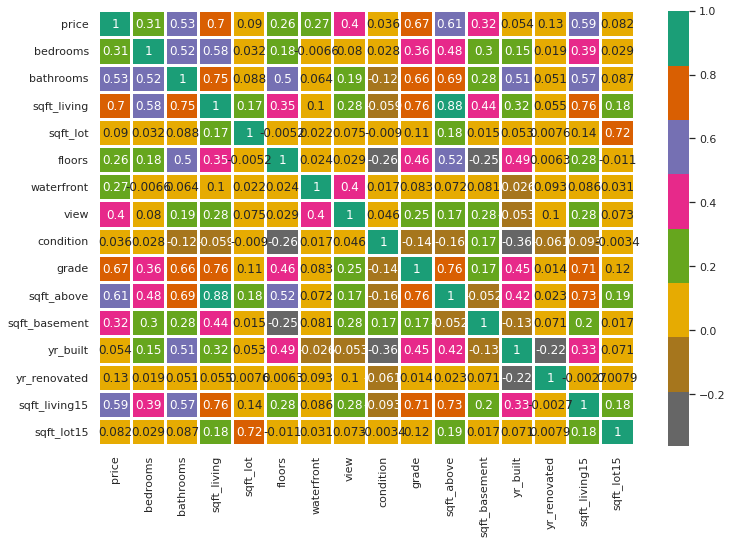

In [28]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [29]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101) #Este renglon nos lo fusilamos

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)
